# Tutorial Iris Flower

Neste tutorial, usaremos um conceito de Machine Learning com a ajuda do ScikitLearn a Machine Learning Package e do conjunto de dados Iris, que podem ser carregados a partir do sklearn. Usarei numpy para trabalhar no conjunto de dados Iris e no Matplotlib para a visualização. Iris data set é um conjunto de dados multivariado introduzido pelo estatístico e biólogo britânico Ronald Fisher em seu artigo de 1936. O uso de múltiplas medições em problemas taxonômicos como um exemplo de análise discriminante linear. O conjunto de dados consiste em 50 amostras de cada uma das três espécies de íris:

<ul>
  <li>Iris setosa</li>
  <li>Iris virginica</li>
  <li>Iris versicolor</li>
</ul>

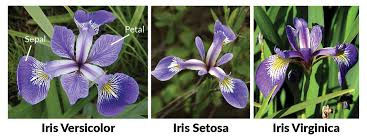

Quatro características foram medidas a partir de cada amostra:

<ul>
  <li>Comprimento do sepal (cm)</li>
  <li>Largura Sépala (cm)</li>
  <li>Comprimento da Pétala (cm)</li>
  <li>Largura da Pétala (cm)</li>
</ul>

 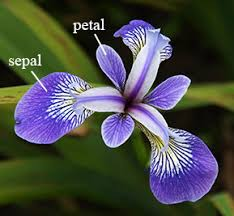


Os conjuntos de dados da íris são os dados básicos do Machine Learning. O objetivo deste tutorial é encontrar as espécies de flor Iris dos dados de teste usando o modelo treinado. Estou usando a árvore de decisão do pacote Python do Sklearn.

## Importação da Biblioteca e Modulo

Primeiro, importacao da biblioteca e o módulo necessários no console do python. Neste aprendizado de máquina, usaremos:

Numpy: que fornece suporte para computação numérica mais eficiente

Pandas: uma biblioteca conveniente que suporta quadros de dados.

Matplotlib & Seaborne: para visualização

ScikitLearn: Ferramentas de aprendizado de máquina

```python
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib
```

#### Agora é sua vez! importe as bibliotecas necessarias


## Carregar dados da íris

Agora, vamos carregar os dados da íris do conjunto de dados interno do Seaborne e imprimir as primeiras 5 linhas da seguinte forma:

```python
iris = sns.load_dataset("iris")
print(iris.head())

#   comprimento da sépala  largura da sépala  comprimento da pétala  espécie da largura da pétala
#0           5.1          3.5           1.4          0.2  setosa
#1           4.9          3.0           1.4          0.2  setosa
#2           4.7          3.2           1.3          0.2  setosa
#3           4.6          3.1           1.5          0.2  setosa
#4           5.0          3.6           1.4          0.2  setosa
```

Vamos olhar os dados

```python
print (iris.shape)

#(150, 5)
```

Temos 150 amostras e 5 recursos, incluindo nosso recurso de segmentação. Podemos imprimir facilmente algumas estatísticas resumidas.

```python
print(iris.describe())

#       comprimento da sépala  largura da sépala  comprimento da pétala  largura da pétala
#count    150.000000   150.000000    150.000000   150.000000
#mean       5.843333     3.057333      3.758000     1.199333
#std        0.828066     0.435866      1.765298     0.762238
#min        4.300000     2.000000      1.000000     0.100000
#25%        5.100000     2.800000      1.600000     0.300000
#50%        5.800000     3.000000      4.350000     1.300000
#75%        6.400000     3.300000      5.100000     1.800000
#max        7.900000     4.400000      6.900000     2.500000
```


<ul>
  <li>Comprimento do sepal</li>
  <li>Largura Sépala</li>
  <li>Comprimento da Pétala</li>
  <li>Largura da Pétala</li>
</ul>

#### Agora é sua vez! Carregue os dados da Iris,imprima as 5 primeiras linhas,olhes os dados e imprima as características resumidas

## Dividir dados em conjuntos de treinamento e teste

Dividimos os dados em conjuntos de treinamento e teste no início do fluxo de trabalho de modelagem. O corte é crucial para obter uma estimativa realista do desempenho do modelo.

Primeiro, vamos separar nossos recursos de destino de nossos recursos de entrada (X):

```python
y = iris.species
X = iris.drop('species',axis=1)
```


Agora usamos a função Scikit learn train_test_split:

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=100,stratify=y)
```

Vamos separar 30% dos dados como um conjunto de testes para avaliar o modelo. E também definimos um “estado aleatório” arbitrário para que o programa possa reproduzir nossos resultados.


#### Agora é sua vez! Separe os recursos de destino dos recursos de entrada e use a função Scikit learn train_test_split

## Visualização

Agora vamos plotar o gráfico para entendermos as caracteristicas e as espécies nos dados.Estamos usando o seaborne e o matplotlib para fazer esses graficos

```python
sns.set(style="ticks")
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue="species",palette="bright")
plt.show()
```
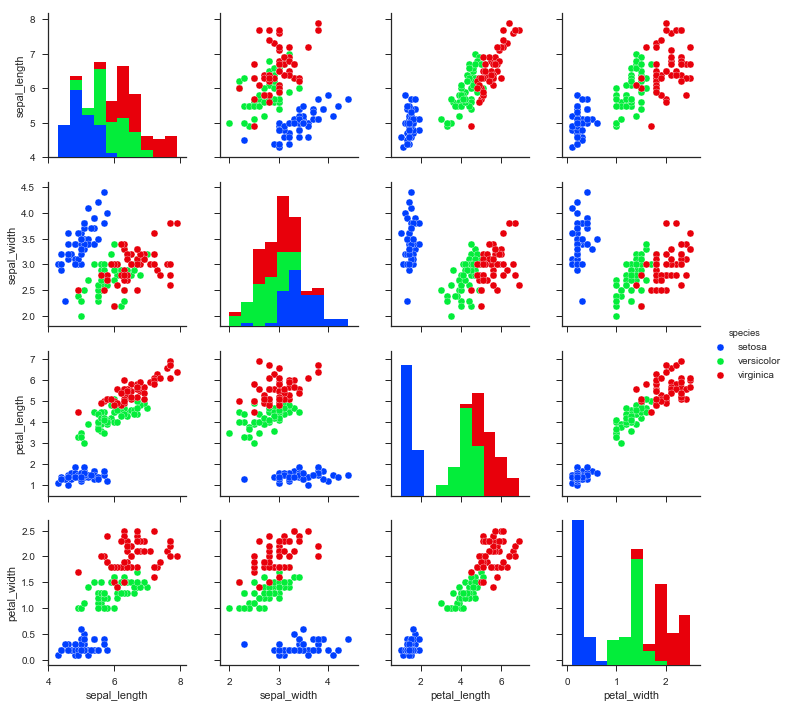

O gráfico acima é um gráfico de dispersão que é traçado entre quatro características da íris em 12 gráficos diferentes. Na foto acima, podemos ver as amostras formadas por clusters de acordo com suas espécies.

No próximo gráfico, vamos plotar as 4 características de 3 espécies de íris em barplot:

```python
piris = pd.melt(iris, "species", var_name="medicao") sns.factorplot(x="medicao", y="valor", hue="species", data=piris, size=7, kind="bar",palette="bright") plt.show() 
print(piris.head())

#  species   medição  valor
#0  setosa  sepal_length    5.1
#1  setosa  sepal_length    4.9
#2  setosa  sepal_length    4.7
#3  setosa  sepal_length    4.6
#4  setosa  sepal_length    5.0
```
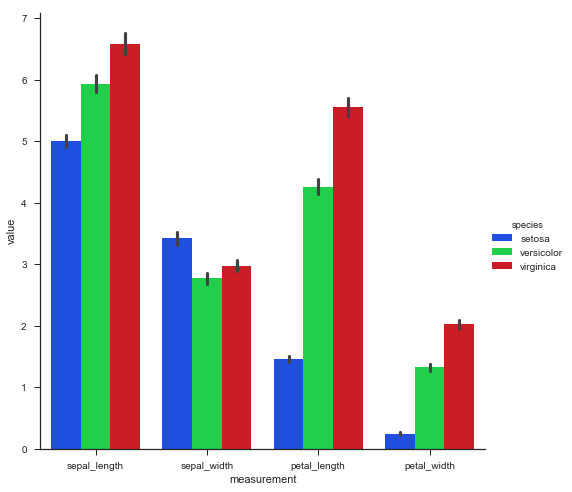

No código acima, fiz novas variáveis ​​piris para facilitar a visualização. Esta imagem mostra como três espécies de íris diferem com base nas quatro características

#### Agora é sua vez! Plote o gráfico e depois plote as 4 caracteristicas de 3 espécies

## Árvore de Decisão

Algoritmo de árvore de decisão é um algoritmo de aprendizado supervisionado simples que é usado em problemas de regressão e classificação. Vou fazer o classificador Decision Tree e ajustar os dados de treinamento (X_train e y_train) para treinar o modelo

```python
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

#DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
#            max_features=None, max_leaf_nodes=None,
#            min_impurity_split=1e-07, min_samples_leaf=1,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            presort=False, random_state=None, splitter='best')
```


Depois de ajustar os dados de treinamento, o classificador Decision_tree cria uma árvore usando qual classificador irá classificar as espécies de dados de teste. A Árvore de Decisão pode ser criada como abaixo:

```python
from sklearn.datasets import load_iris
iris=load_iris()
tree.export_graphviz(clf,
out_file='iris.dot',  feature_names=iris.feature_names, class_names=iris.target_names,filled=True, rounded=True, special_characters=True)
```


Estamos usando o módulo graphviz e dot para criar um arquivo de ponto que pode ser visualizado usando o aplicativo graphviz. A árvore que pegamos está abaixo:

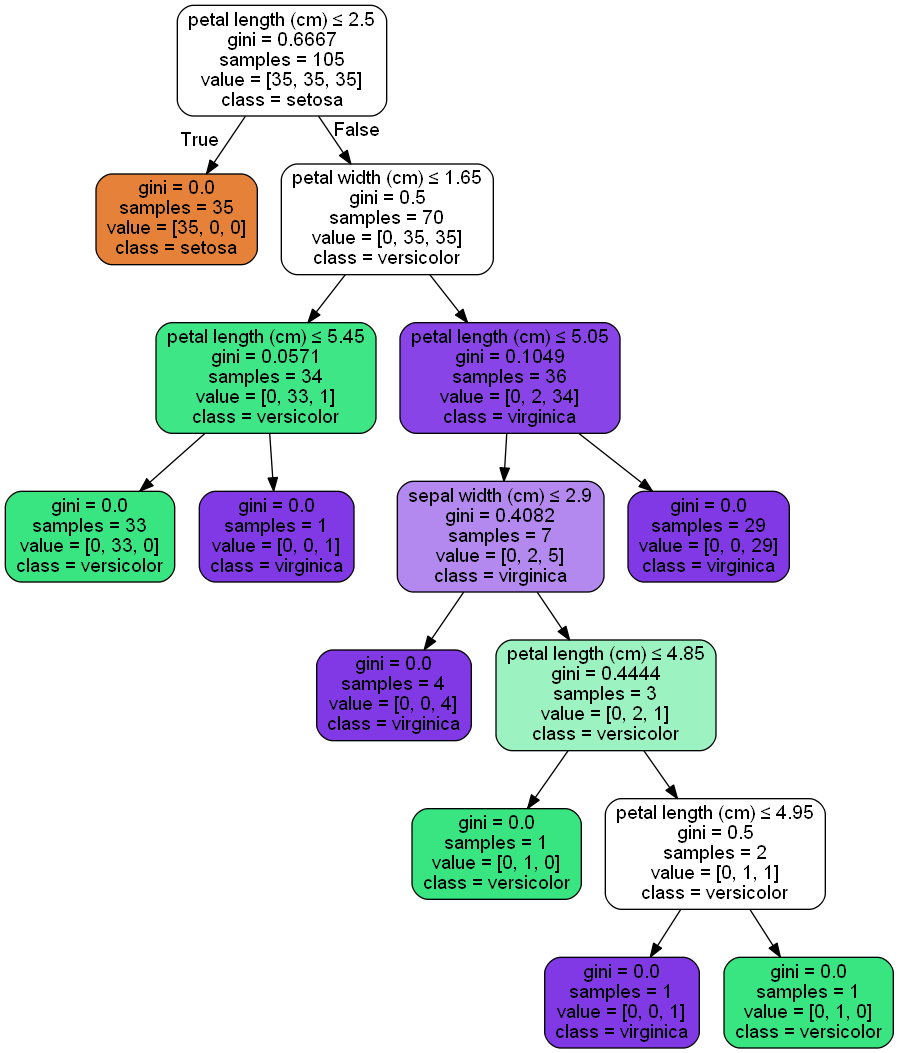

Usando a árvore acima, o classificador irá classificar nossos dados de teste. Lembre-se de que a árvore acima é formada pelo classificador usando os dados de treinamento.


#### Agora é sua vez! Faça o classificador Decision Tree e ajuste os dados de treinamento para treinar o modelo e depois crie a Árvore de Decisão

## Predição

É hora da previsão sobre as espécies dos dados de teste e é o teste do nosso modelo.

```python
y_pred = (clf.predict(X_test))
```

Passamos os dados do X_test para modelar a previsão do nosso modelo e salvei a previsão como y_pred.

### Agora é sua vez! Faça a predição do nosso modelo

## Verificação de precisão

```python
print ('Pontuação de precisão');
print (accuracy_score(y_test, y_pred)* 100);

#Pontuação de precisão
#95.5555555556
```


Nossa model obteve precisão de 95,5556 pontos em 100.

#### Faça a verificação da sua precisão!

## Salvar a Model

É hora de salvarmos a nossa model para uso futuro e concluir a tarefa.
```python
joblib.dump(clf, 'iris.pkl')
#['iris.pkl']
```

Podemos carregar esse arquivo .pkl do modo abaixo:
```python
clf2 = joblib.load('iris.pkl')
clf2.predict(X_test)
```

Depois de carregar a model,podemos usar para prever os dados como nesse tutorial. 

#### Salve o seu modelo!